In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv(r'car_data.csv')


print(df)

      ID  symboling                      name fueltypes aspiration  \
0      1          3        alfa-romero giulia       gas        std   
1      2          3       alfa-romero stelvio       gas        std   
2      3          1  alfa-romero Quadrifoglio       gas        std   
3      4          2               audi 100 ls       gas        std   
4      5          2                audi 100ls       gas        std   
..   ...        ...                       ...       ...        ...   
200  201         -1           volvo 145e (sw)       gas        std   
201  202         -1               volvo 144ea       gas      turbo   
202  203         -1               volvo 244dl       gas        std   
203  204         -1                 volvo 246    diesel      turbo   
204  205         -1               volvo 264gl       gas      turbo   

    doornumbers      carbody drivewheels enginelocation  wheelbase  ...  \
0           two  convertible         rwd          front       88.6  ...   
1        

In [2]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

class LinearRegression:

    def __init__(self, learningRate = 0.001, noIt=1000):
        self.learningRate = learningRate
        self.noIt = noIt
        self.ceta = None
        self.b = None
        
   

    def fit(self, X, y):
        noOfRaws, noFeatures = X.shape
        self.ceta = np.zeros(noFeatures)
        self.b = 0
    
        arrmse=[]
        arrit=[]

        for i in range(self.noIt):
            y_pred = np.dot(X, self.ceta) + self.b
           
            dceta = (1/noOfRaws) * np.dot(X.T, (y_pred-y))
            db = (1/noOfRaws) * np.sum(y_pred-y)
            self.ceta = self.ceta - self.learningRate * dceta
            self.b = self.b - self.learningRate * db
            z=mse(y,y_pred)
            print(z)
            arrmse.append(z)
            arrit.append(i)
        plt.plot(arrit,arrmse)
        plt.show()
            

    def predict(self, X):
        res = np.dot(X, self.ceta) + self.b
        return res


      ID  symboling                     name fueltypes aspiration doornumbers  \
0    129          3           porsche boxter       gas        std         two   
1     31          2              honda civic       gas        std         two   
2    147          0            subaru trezia       gas        std        four   
3     72         -1  buick opel isuzu deluxe       gas        std        four   
4      1          3       alfa-romero giulia       gas        std         two   
..   ...        ...                      ...       ...        ...         ...   
200  178         -1           toyota mark ii       gas        std        four   
201   21          0      chevrolet vega 2300       gas        std        four   
202   70          0            buick century    diesel      turbo         two   
203   22          1            dodge rampage       gas        std         two   
204  204         -1                volvo 246    diesel      turbo        four   

         carbody drivewheel

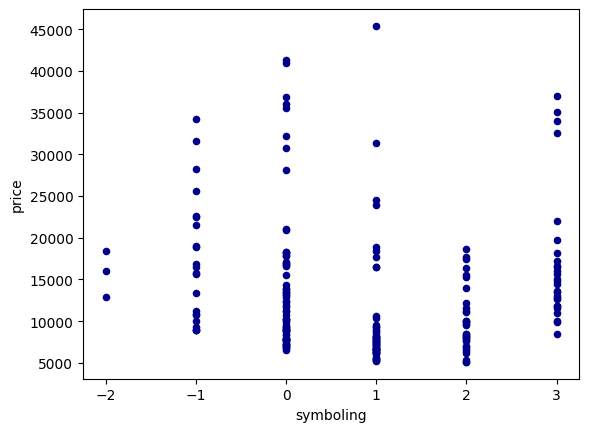

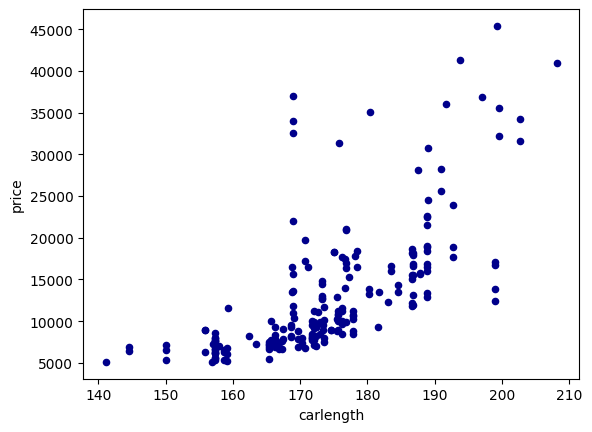

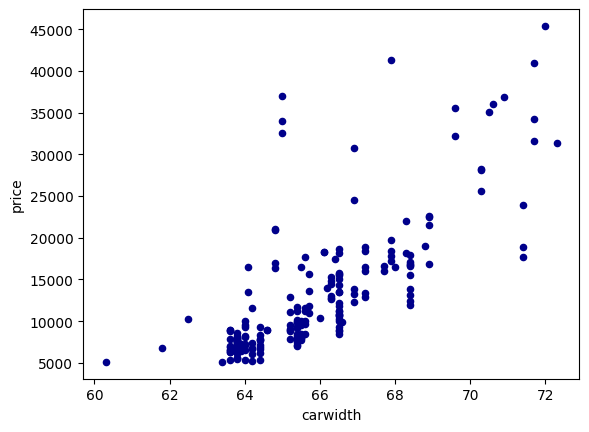

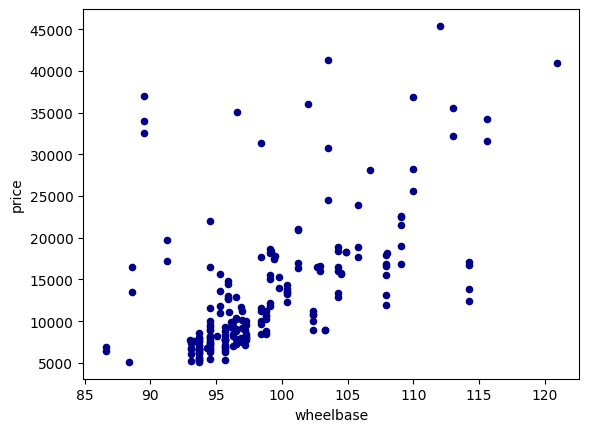

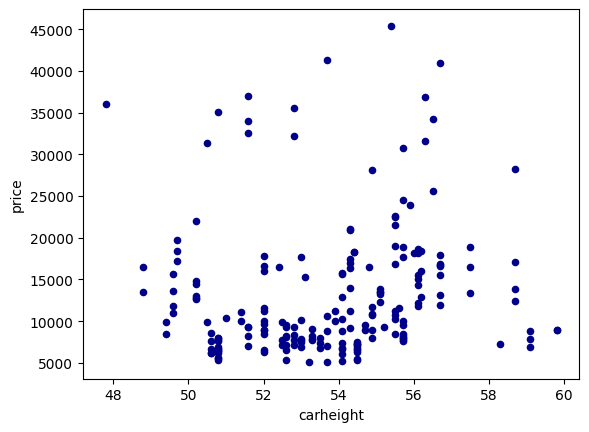

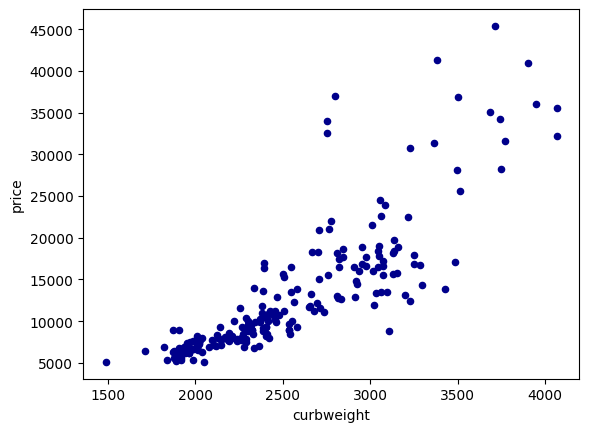

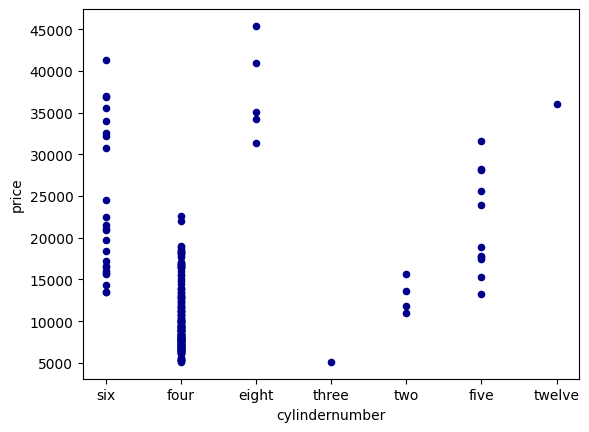

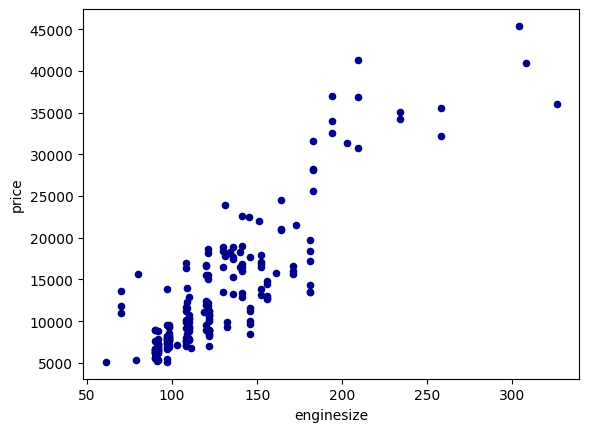

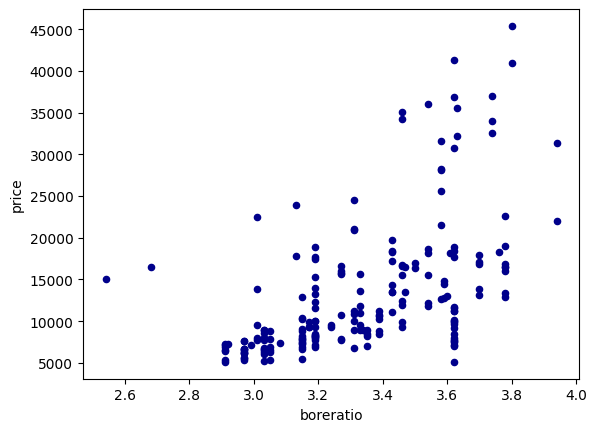

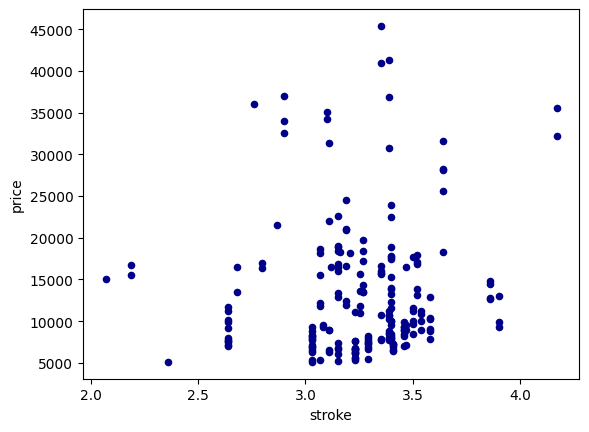

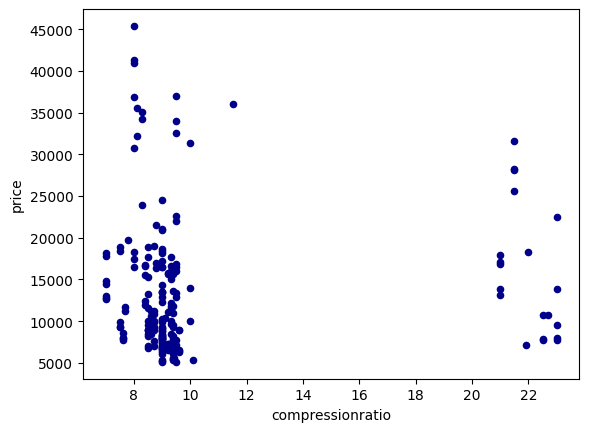

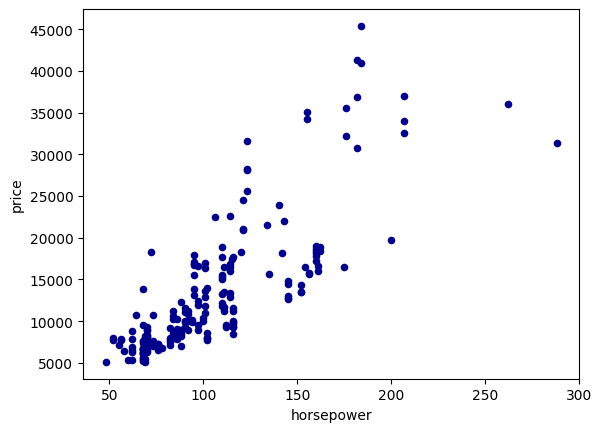

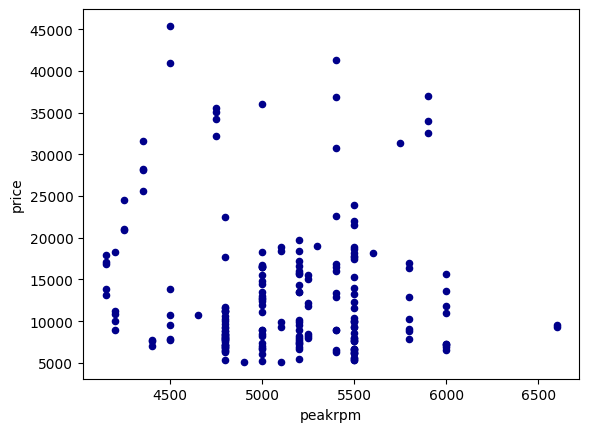

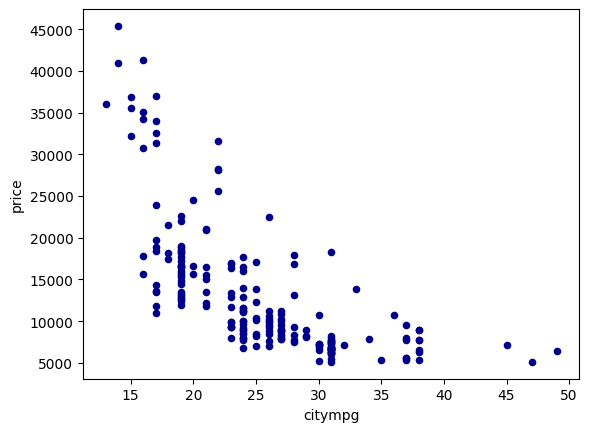

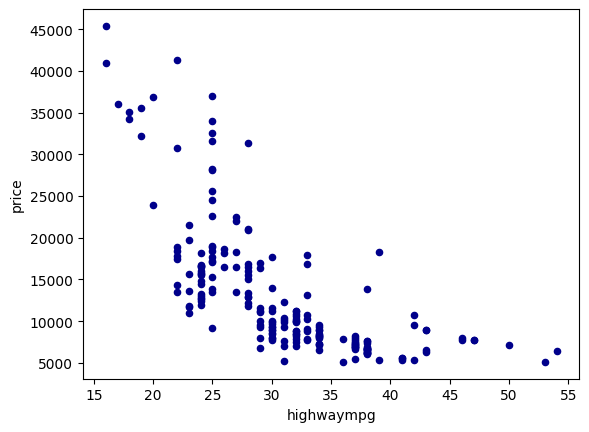

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
print(df)

ax1 = df.plot.scatter(x='symboling',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='carlength',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='carwidth',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='wheelbase',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='carheight',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='curbweight',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='cylindernumber',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='enginesize',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='boreratio',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='stroke',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='compressionratio',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='horsepower',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='peakrpm',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='citympg',
                     y='price',
                      c='DarkBlue')
ax1 = df.plot.scatter(x='highwaympg',
                     y='price',
                      c='DarkBlue')

In [4]:
df = df[['citympg','highwaympg','enginesize','curbweight','price']]
print(df)

     citympg  highwaympg  enginesize  curbweight    price
0         17          25         194        2800  37028.0
1         49          54          92        1713   6479.0
2         28          32         108        2290   7463.0
3         16          18         234        3740  34184.0
4         21          27         130        2548  13495.0
..       ...         ...         ...         ...      ...
200       27          32         122        2458  11248.0
201       38          43          90        1909   6575.0
202       22          25         183        3495  28176.0
203       37          41          90        1876   5572.0
204       26          27         145        3217  22470.0

[205 rows x 5 columns]


In [5]:
df_train=df.sample(frac=0.8, random_state=25)
df_test= df.drop(df_train.index)

In [6]:
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]
X_test= df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]
print(X_train)
print(y_train)

     citympg  highwaympg  enginesize  curbweight
26        17          22         130        3045
122       14          16         304        3715
190       19          24         120        3075
43        31          37          97        2008
69        27          32         122        2414
..       ...         ...         ...         ...
130       33          38          97        2579
116       22          25         183        3515
104       31          37          97        1971
158       34          36         110        2275
98        14          16         308        3900

[164 rows x 4 columns]
26     18420.0
122    45400.0
190    15580.0
43      8249.0
69     10898.0
        ...   
130    13845.0
116    25552.0
104     7499.0
158     7898.0
98     40960.0
Name: price, Length: 164, dtype: float64


In [7]:
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

227794437.91270664
220060219.95713973
212670153.59838462
205608657.71656042
198860857.54177228
192412552.62944493
186250186.28760827
180360816.39030737
174732087.5142907
169352204.3389817
164209906.25245756
159294443.10875726
154595552.08431816
150103435.5837098
145808740.147089
141702536.31396186
137776299.39989355
134021891.1447746
130431542.19312859
126997835.3687376
123713689.70757186
120572345.21464361
117567348.31196329
114692537.94626406
111942032.32658228
109310216.2631369
106791729.08024523
104381453.07725021
102074502.51261185
99866213.08744402
97752131.9058524
95728007.89045587
93789782.63245408
91933581.6565393
90155706.0818447
88452624.6609721
86820966.17995933
85257512.20282064
83759190.14503986
82323066.66110009
80946341.33181347
79626340.63785735
78360512.20654161
77146419.31941861
75981735.66890955
74864240.35265769
73791813.09482948
72762429.6840748
71774157.61832279
70825151.94703595
69913651.3019698
69037974.10789166
68196514.96509951
67387741.19595146
66610189.5479

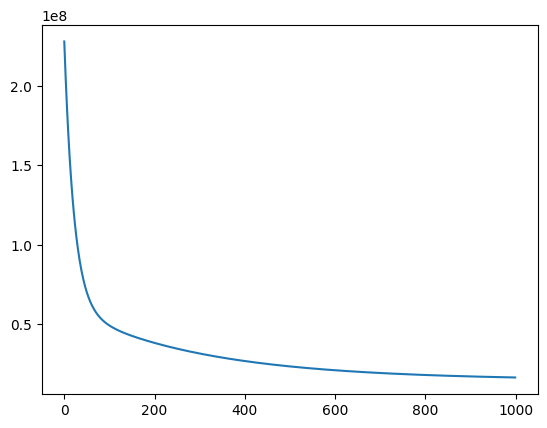

mean square =15594467.92645364


In [8]:
reg = LinearRegression(learningRate=0.015)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print("mean square ="+str(mse))